In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [63]:
from sklearn import ensemble, cross_validation
from sklearn.datasets import load_digits 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

import numpy as np
import pandas as pd

### Данные

In [3]:
digits = load_digits()

In [6]:
X = digits.data
Y = digits.target

In [28]:
# print digits.DESCR

In [ ]:
#
def write_answer(number, mean):
    with open("answer" + str(number) + ".txt", "w") as fout:
        fout.write(str(mean))


### Шаг 1
Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [54]:
cls = DecisionTreeClassifier()

In [55]:
score1 = cross_validation.cross_val_score(cls, cv = 10, X = X, y = Y)

In [56]:
mean1 = score1.mean()
write_answer(1, mean1)        
print mean1

0.832482044316


### Шаг 2
Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [48]:
bagging_cls = BaggingClassifier(n_estimators=100)
score = cross_validation.cross_val_score(bagging_cls, cv = 10, X = X, y = Y)

In [51]:
mean2 = score.mean()
write_answer(2, mean2)        
print mean2

0.92433560375


### Шаг 3
Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на  $\sqrt{d}$ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [42]:
features = X.shape[1]
max_features = int(features ** 0.5)
print max_features

8


In [58]:
bagging_cls_d = BaggingClassifier(n_estimators=100, max_features = max_features)
score = cross_validation.cross_val_score(bagging_cls_d, cv = 10, X = X, y = Y)

In [59]:
mean3 = score.mean()
write_answer(3, mean3)        
print mean3

0.933857086778


### Шаг 4
Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [60]:
bagging_cls_t = BaggingClassifier(base_estimator =DecisionTreeClassifier(max_features = max_features), n_estimators=100)
score = cross_validation.cross_val_score(bagging_cls_t, cv = 10, X = X, y = Y)

In [61]:
mean4 = score.mean()
write_answer(4, mean4)        
print mean4

0.956662937481


### Шаг 5
Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [66]:
clf = RandomForestClassifier(n_estimators = 100, max_features = max_features)
scores = cross_validation.cross_val_score(clf, X, Y, cv = 10)


In [68]:
print scores.mean()

0.952223015544


In [69]:
# от числа деревьев
number_of_estimators = np.arange(5, 150, 5)
scores_estimators = []
for n in number_of_estimators:
    print n,
    clf = RandomForestClassifier(n_estimators = n, max_features = max_features)
    scores_estimators.append(cross_validation.cross_val_score(clf, X, Y, cv = 10).mean())

5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100 105 110 115 120 125 130 135 140 145


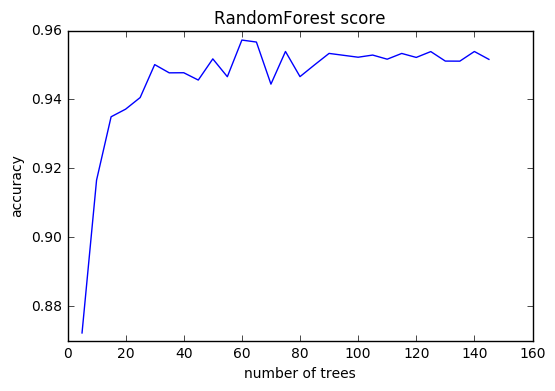

In [70]:
plt.plot(number_of_estimators, scores_estimators)
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.title('RandomForest score')

In [71]:
# от глубины деревьев
depths = np.arange(1, 15, 1)
scores_depth = []
for n in depths:

    clf = RandomForestClassifier(n_estimators = 100, max_features = max_features, max_depth = n)
    scores_depth.append(cross_validation.cross_val_score(clf, X, Y, cv = 10).mean())

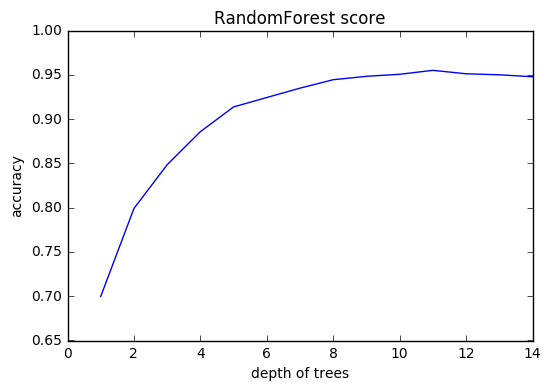

In [72]:
plt.plot(depths, scores_depth)
plt.xlabel('depth of trees')
plt.ylabel('accuracy')
plt.title('RandomForest score')